# Data Analytics and Learning

Wellington Daniel | Davareesh | Namratha Velivelli | Rashi Agarwal

**PREDICTING THE DEMAND PATTERN IN BIKE SHARING INDUSTRY**

 









---





**Context:**

In the bike-sharing industry, the current practice is to charge a fee, on an hourly basis. Though, this is a simpler mechanism, the company might lose out on revenue because the usage is less during parts of a year. The reduction in demand can be explained by multiple reasons, namely seasonality, time of the day, etc. 
 
If the company can predict how much demand is expected in the upcoming month/week, it shall be used to generate more revenue and capture more consumer surplus. For example, if the predicted demand in the upcoming week is going to be less than the average, then they shall roll out an offer and increase the users (Few bikes would otherwise be idle and generate no revenue). On the other hand, if the predicted demand is higher than what we can service, we can also increase the charges for the season.
 
The preceding step to altering price is predicting demand of the upcoming week and what are the factors that contribute to it.**bold text**

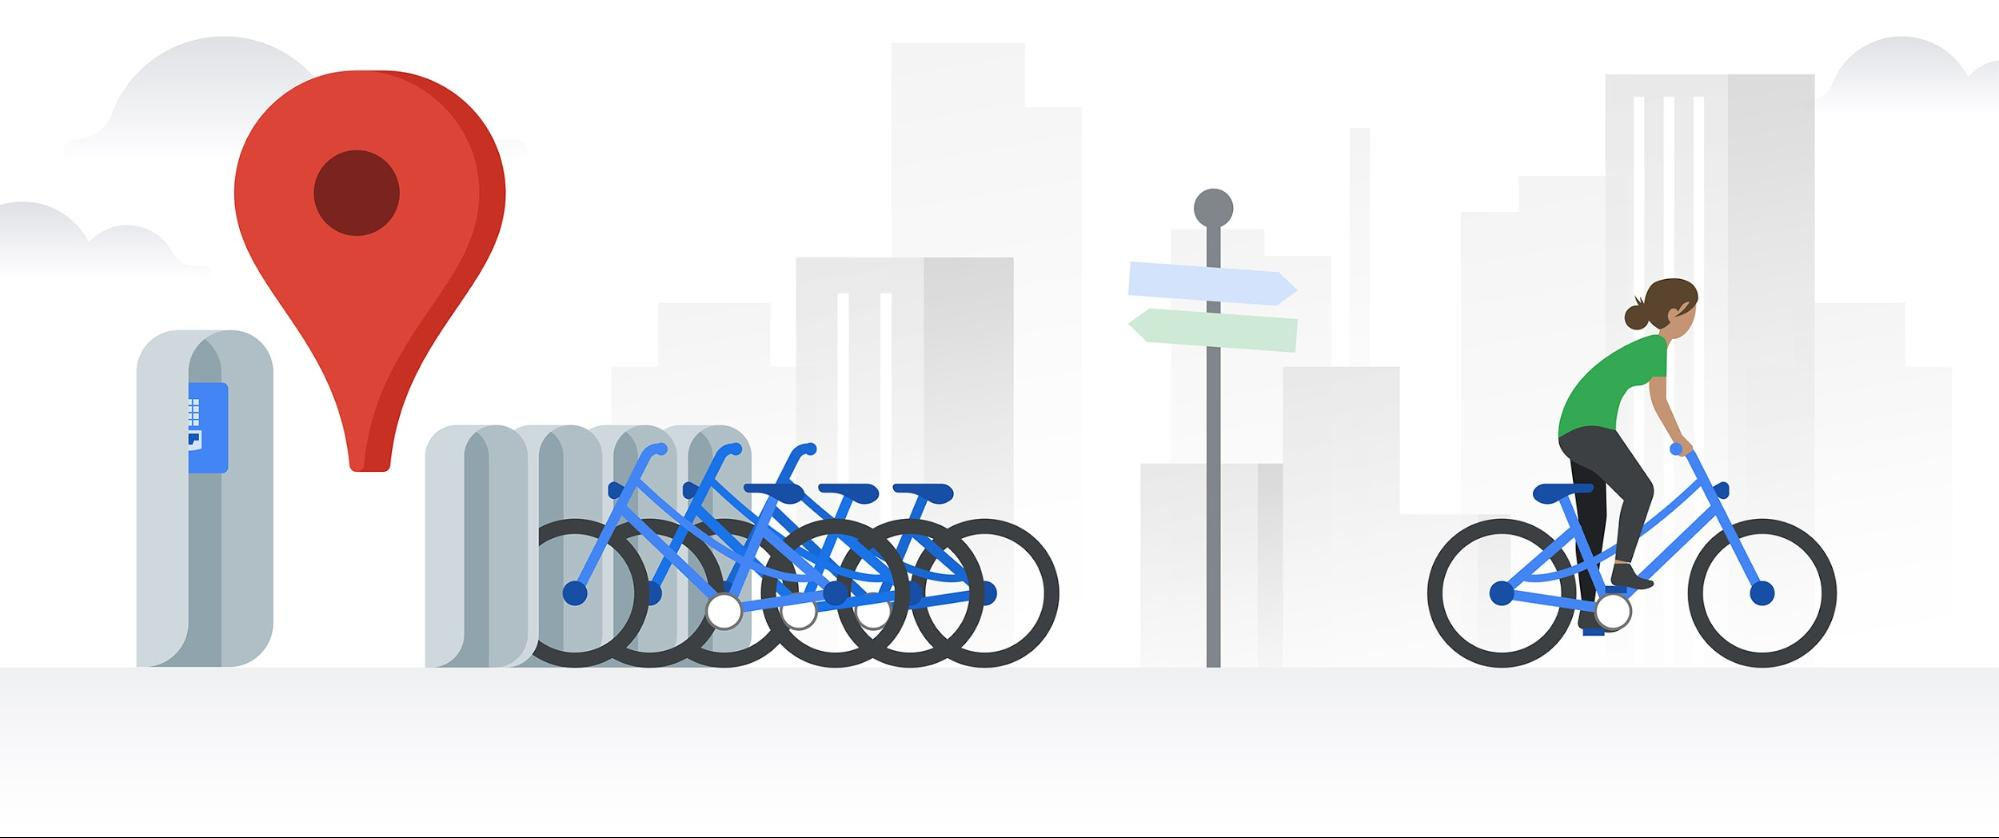

**Problem Statement:**

What factors determine the demand for bike sharing facilities?

**Dataset:** https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset



**Predictor** **Variable:**  Total demand of bike sharing in that hour

**Independent** **variables:**
1.  Day (chr): Day of the week of start of the ride
2.   Month (chr): Month of the start of the ride
3.   Hour (chr): Hour of the start of ride
4.   Member type (Factor with 2 levels): Whether the user is a member or a casual user of the bike.
5. Start Station (chr): The starting location of the bike ride.
6. End Location (chr) : The ending location of the bike ride.



**Note:** Dataset contains details about every ride, starting date, starting location and ending date and ending location, from which IVs are calculated. The dataset taken while getting the following code is for the year 2017 where the data is available quarter-wise. It would be collated in the code.



---





# Code

In [ ]:
install.packages("rpart")
install.packages("rpart.plot")
install.packages("randomForest")
library(modelr)
library(cluster)
library(rpart)
library(rpart.plot)
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [ ]:
data1=read.csv("data1.csv")
data2=read.csv("data2.csv")
data3=read.csv("data3.csv")
data4=read.csv("data4.csv")

### Data Pre Processing

In [ ]:
data<-rbind(data1,data2,data3,data4)

In [ ]:
rm(data1,data2,data3,data4)

In [ ]:
sum(is.na(data))  

[1] 0

In [ ]:
data<-na.omit(data)

In [ ]:
head(data)

,Duration,Start.date,End.date,Start.station.number,Start.station,End.station.number,End.station,Bike.number,Member.type
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
2,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
3,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
4,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
5,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual
6,1603,2017-01-01 00:08:11,2017-01-01 00:34:55,31258,Lincoln Memorial,31270,8th & D St NW,W20890,Casual


In [ ]:
str(data)

'data.frame':	3757777 obs. of  9 variables:
 $ Duration            : int  221 1676 1356 1327 1636 1603 473 200 748 912 ...
 $ Start.date          : chr  "2017-01-01 00:00:41" "2017-01-01 00:06:53" "2017-01-01 00:07:10" "2017-01-01 00:07:22" ...
 $ End.date            : chr  "2017-01-01 00:04:23" "2017-01-01 00:34:49" "2017-01-01 00:29:47" "2017-01-01 00:29:30" ...
 $ Start.station.number: int  31634 31258 31289 31289 31258 31258 31611 31104 31041 31202 ...
 $ Start.station       : chr  "3rd & Tingey St SE" "Lincoln Memorial" "Henry Bacon Dr & Lincoln Memorial Circle NW" "Henry Bacon Dr & Lincoln Memorial Circle NW" ...
 $ End.station.number  : int  31208 31270 31222 31222 31270 31270 31616 31121 31097 31505 ...
 $ End.station         : chr  "M St & New Jersey Ave SE" "8th & D St NW" "New York Ave & 15th St NW" "New York Ave & 15th St NW" ...
 $ Bike.number         : chr  "W00869" "W00894" "W21945" "W20012" ...
 $ Member.type         : chr  "Member" "Casual" "Casual" "Casual" ...


In [ ]:
data$duration<-as.POSIXct(data$End.date)-as.POSIXct(data$Start.date)
data$day<-weekdays(as.Date(data$Start.date))
data$month<-format((as.Date(data$Start.date)),"%B")
data$hour<-format((as.POSIXct(data$Start.date)),"%H")
data$date<-format(as.POSIXct(data$Start.date),format='%Y-%m-%d %H')

In [ ]:
str(data)

'data.frame':	3757777 obs. of  14 variables:
 $ Duration            : int  221 1676 1356 1327 1636 1603 473 200 748 912 ...
 $ Start.date          : chr  "2017-01-01 00:00:41" "2017-01-01 00:06:53" "2017-01-01 00:07:10" "2017-01-01 00:07:22" ...
 $ End.date            : chr  "2017-01-01 00:04:23" "2017-01-01 00:34:49" "2017-01-01 00:29:47" "2017-01-01 00:29:30" ...
 $ Start.station.number: int  31634 31258 31289 31289 31258 31258 31611 31104 31041 31202 ...
 $ Start.station       : chr  "3rd & Tingey St SE" "Lincoln Memorial" "Henry Bacon Dr & Lincoln Memorial Circle NW" "Henry Bacon Dr & Lincoln Memorial Circle NW" ...
 $ End.station.number  : int  31208 31270 31222 31222 31270 31270 31616 31121 31097 31505 ...
 $ End.station         : chr  "M St & New Jersey Ave SE" "8th & D St NW" "New York Ave & 15th St NW" "New York Ave & 15th St NW" ...
 $ Bike.number         : chr  "W00869" "W00894" "W21945" "W20012" ...
 $ Member.type         : chr  "Member" "Casual" "Casual" "Casual" ...
 $ du

## Exploratory Data Analysis

 **Distribution of Duration**

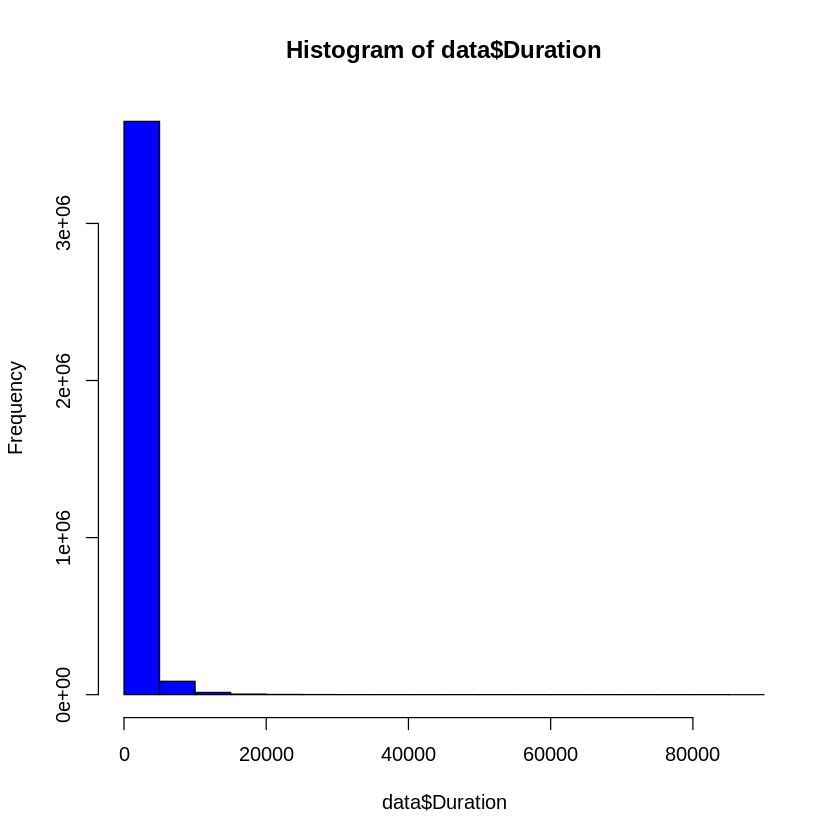

In [ ]:
hist(data$Duration,col="blue")

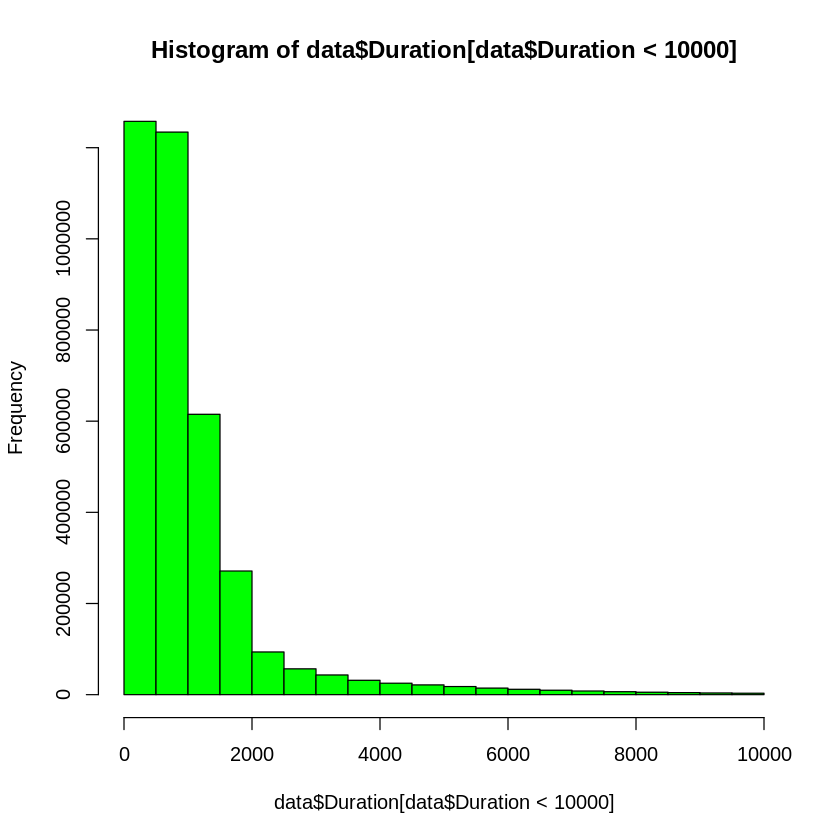

In [ ]:
hist(data$Duration[data$Duration<10000],col="green")

 **Daywise Trips**

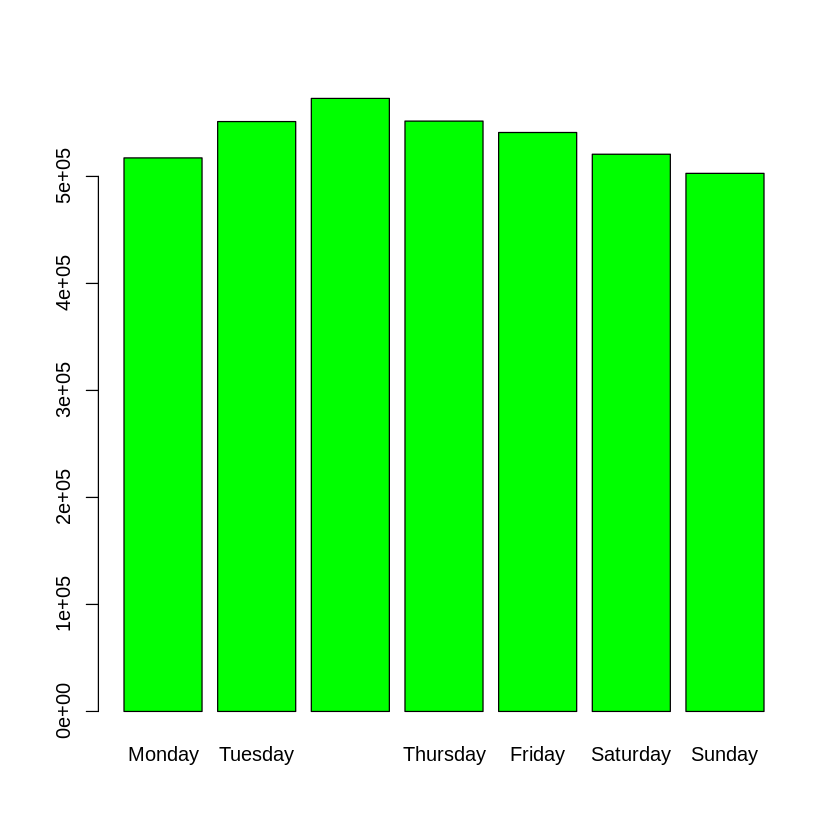

In [ ]:
dataday=factor(data$day,levels=c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))
plot(dataday,col="green")

 **Monthwise Trips**

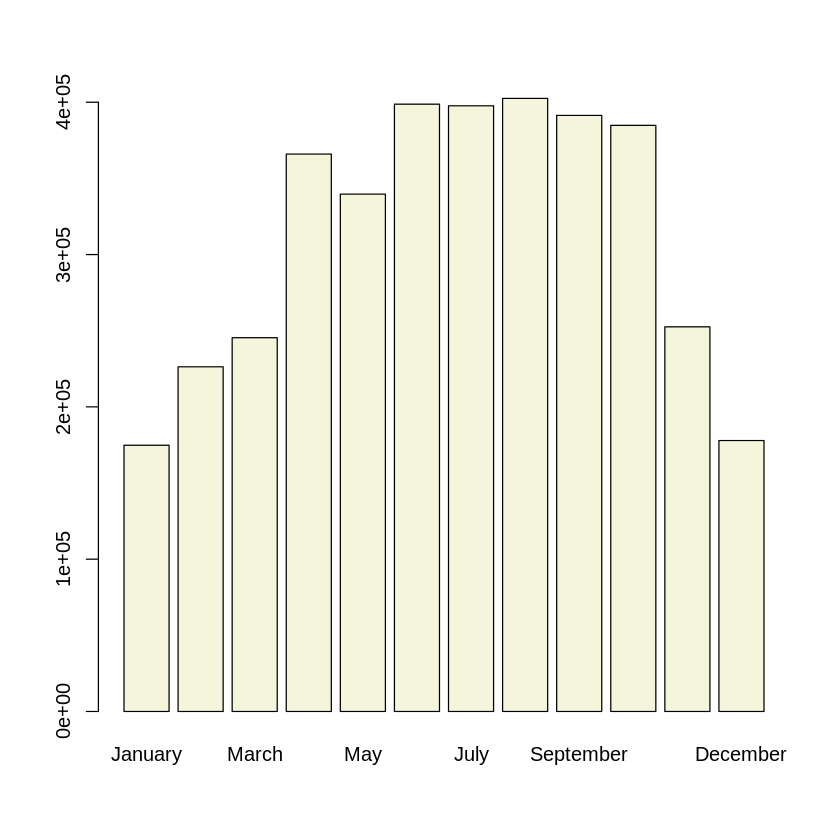

In [ ]:
datamonth = factor(data$month,levels=c("January","February","March","April","May","June","July","August","September","October","November","December"))
plot(datamonth,col="beige")

 **Hourwise Trips**

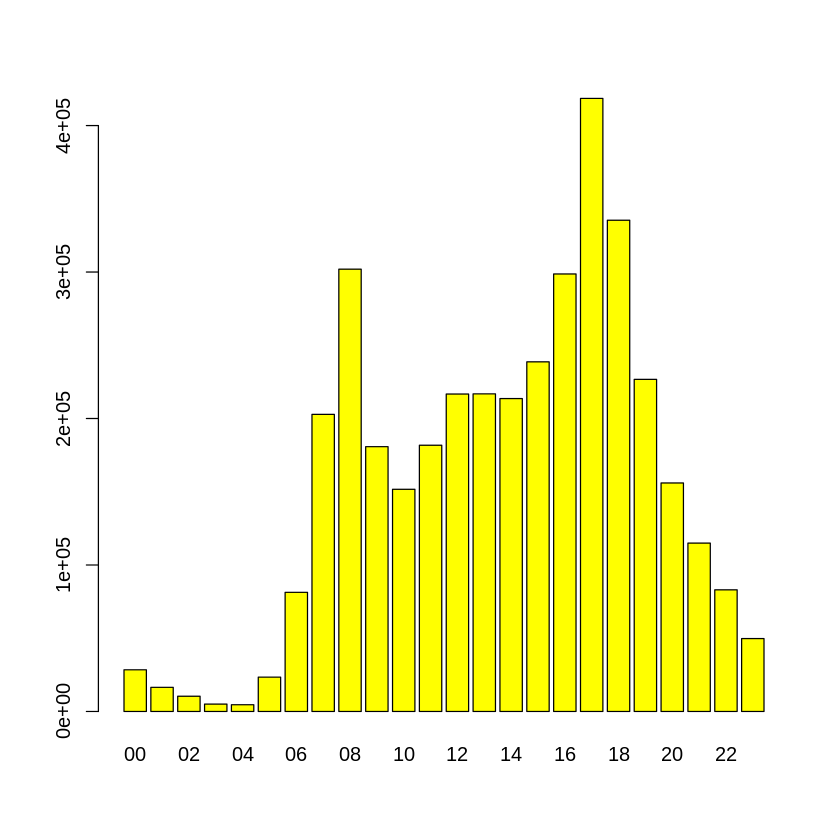

In [ ]:
plot(as.factor(data$hour),col="yellow")

 **Impact of user type**

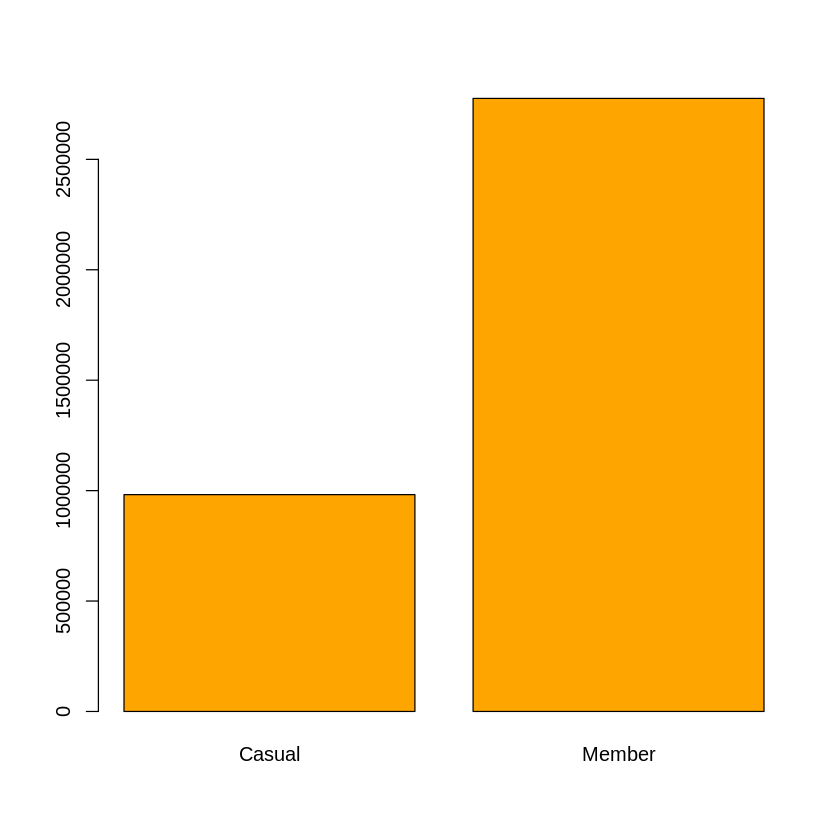

In [ ]:
plot(as.factor(data$Member.type),col="orange")

## Clustering

**Data Preprocessing**

In [ ]:
dim(data)
Clusterdata<-data[,c(1,5,7,9,11,12,13)]
str(Clusterdata)

[1] 3757777      14

'data.frame':	3757777 obs. of  7 variables:
 $ Duration     : int  221 1676 1356 1327 1636 1603 473 200 748 912 ...
 $ Start.station: chr  "3rd & Tingey St SE" "Lincoln Memorial" "Henry Bacon Dr & Lincoln Memorial Circle NW" "Henry Bacon Dr & Lincoln Memorial Circle NW" ...
 $ End.station  : chr  "M St & New Jersey Ave SE" "8th & D St NW" "New York Ave & 15th St NW" "New York Ave & 15th St NW" ...
 $ Member.type  : chr  "Member" "Casual" "Casual" "Casual" ...
 $ day          : chr  "Sunday" "Sunday" "Sunday" "Sunday" ...
 $ month        : chr  "January" "January" "January" "January" ...
 $ hour         : chr  "00" "00" "00" "00" ...


In [ ]:
Clusterdata$Member.type.casual<-ifelse(Clusterdata$Member.type=="Casual",1,0)
Clusterdata$Member.type.member<-ifelse(Clusterdata$Member.type=="Member",1,0)
days<-c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")
for (i in 1:7)
{
  temp<-ifelse(Clusterdata$day==days[i],1,0)
  assign(days[i],temp)
}
months<-c("January","February","March","April","May","June","July","August","September","October","November","December")
for (i in 1:12)
{
  temp<-ifelse(Clusterdata$month==months[i],1,0)
  assign(months[i],temp)
}
for (i in 0:23)
{
  temp<-ifelse(as.integer(Clusterdata$hour)==i,1,0)
  assign(paste0("hour",i),temp)
}
clustdf<-data.frame(Clusterdata$Duration,January,February,March,April,May,June,July,August,September,October,November,December,
                      Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,
                      hour0,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,
                      hour13,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,
                      Clusterdata$Member.type.member,Clusterdata$Member.type.casual,
                      Start=Clusterdata$Start.station,End=Clusterdata$End.station)
head(clustdf)

rm(January,February,March,April,May,June,July,August,September,October,November,December,
    Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,
    hour0,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,
    hour13,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23)

,Clusterdata.Duration,January,February,March,April,May,June,July,August,September,⋯,hour18,hour19,hour20,hour21,hour22,hour23,Clusterdata.Member.type.member,Clusterdata.Member.type.casual,Start,End
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,221,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,3rd & Tingey St SE,M St & New Jersey Ave SE
2,1676,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,Lincoln Memorial,8th & D St NW
3,1356,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,Henry Bacon Dr & Lincoln Memorial Circle NW,New York Ave & 15th St NW
4,1327,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,Henry Bacon Dr & Lincoln Memorial Circle NW,New York Ave & 15th St NW
5,1636,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,Lincoln Memorial,8th & D St NW
6,1603,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,Lincoln Memorial,8th & D St NW


In [ ]:
clustaggregatestart<-clustdf[,-48]%>%dplyr::group_by(Start)%>%dplyr::summarise_each(sum)
clustaggregateend<-clustdf[-47]%>%dplyr::group_by(End)%>%dplyr::summarise_each(sum)
clustaggregatestart<-data.frame(clustaggregatestart)
clustaggregateend<-data.frame(clustaggregateend)
head(clustaggregatestart)

,Start,Clusterdata.Duration,January,February,March,April,May,June,July,August,⋯,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,Clusterdata.Member.type.member,Clusterdata.Member.type.casual
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10th & E St NW,23683044,556,861,921,1679,1361,1666,1843,1644,⋯,1543,2317,1810,1108,667,639,312,200,8357,7053
2,10th & Florida Ave NW,6725448,588,639,677,943,860,926,859,906,⋯,376,467,584,469,430,362,234,190,8156,834
3,10th & G St NW,14876998,599,762,609,1179,1061,1273,1222,1251,⋯,1037,1914,1510,972,552,436,274,181,7956,3709
4,10th & K St NW,19859508,1073,1256,1318,1862,1719,2074,1969,1924,⋯,1563,2363,1561,970,672,462,326,194,14534,4847
5,10th & Monroe St NE,3982019,195,243,245,369,380,377,351,373,⋯,196,371,441,244,181,123,54,40,2998,603
6,10th & U St NW,12303827,796,889,968,1627,1722,1945,1781,1733,⋯,782,1263,1385,1139,924,934,871,740,14317,1970


In [ ]:
head(clustaggregateend)

,End,Clusterdata.Duration,January,February,March,April,May,June,July,August,⋯,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,Clusterdata.Member.type.member,Clusterdata.Member.type.casual
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10th & E St NW,26462532,762,1107,1180,1867,1599,1816,1948,1824,⋯,1153,1505,1545,840,459,348,164,87,10166,7338
2,10th & Florida Ave NW,6228951,514,558,651,869,817,862,778,872,⋯,538,995,1314,1099,761,445,326,198,7586,781
3,10th & G St NW,15759659,799,989,814,1295,1165,1360,1267,1358,⋯,821,1092,979,587,299,204,127,73,9738,3615
4,10th & K St NW,23300615,1086,1259,1347,1888,1690,2062,2020,1950,⋯,1595,1770,1253,801,656,534,427,256,13473,5890
5,10th & Monroe St NE,3668922,150,190,194,297,293,283,298,300,⋯,226,421,226,138,98,61,44,22,2293,565
6,10th & U St NW,12186760,833,882,1062,1585,1682,1914,1719,1669,⋯,1218,2417,2259,1503,1007,843,615,484,13951,2128


In [ ]:
sum(is.na(scale(clustaggregatestart[,-1])))

[1] 0

**Hierarchical Clustering for Start Location**

Hierarchical clustering is used to decise the number of clusters. This is used in Kmeans clustering to decide the number of centers. From the above Dendogram, we decide to go for 2 clusters for the start location as the distance betweeen clusters is similar and they are differentiated enough here.

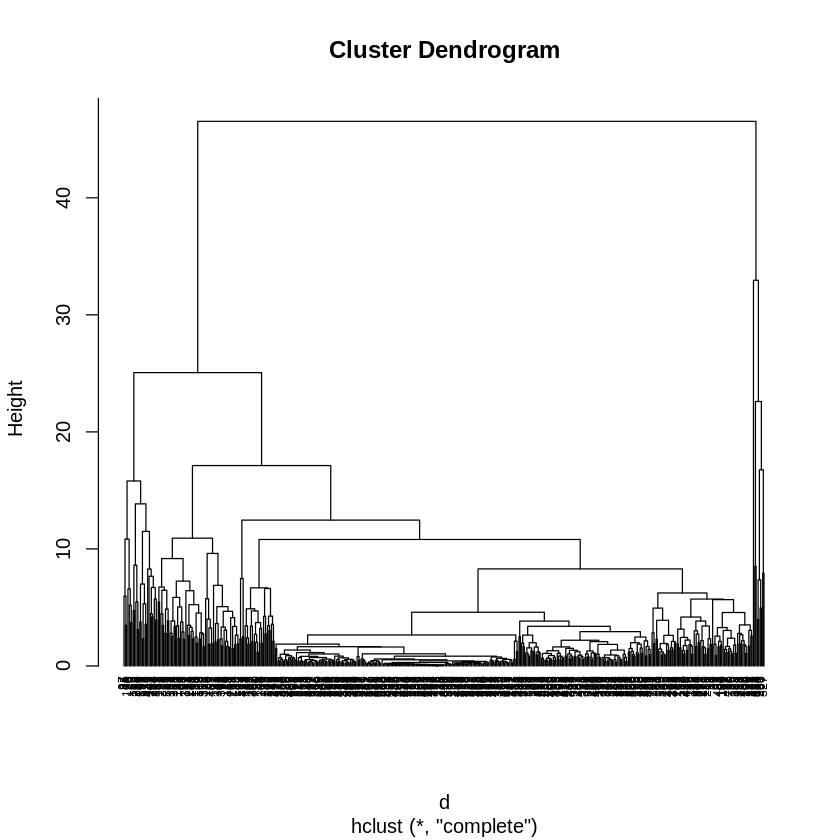

In [ ]:
d <- dist(scale(clustaggregatestart[,c(-1)]))
hc.complete <- hclust(d, method="complete")

plot(hc.complete, cex = 0.6, hang = -1)

**K-means**



Using k-means clustering, we find that cluster 1 has 378 data points while cluster 2 has 109 data points.
52.7% variance in the data is explained by this clustering.

In [ ]:
km<-kmeans(scale(clustaggregatestart[,c(-1)]),2)
km
temp<-data.frame(clustaggregatestart$Start,km$cluster)

K-means clustering with 2 clusters of sizes 378, 109

Cluster means:
  Clusterdata.Duration    January   February      March      April        May
1           -0.3369052 -0.4250904 -0.4361317 -0.4339236 -0.4137244 -0.4226171
2            1.1683500  1.4741668  1.5124569  1.5047992  1.4347506  1.4655896
        June       July     August  September    October   November   December
1 -0.4197552 -0.4105677 -0.4131862 -0.4213947 -0.4208269 -0.4240993 -0.4182436
2  1.4556649  1.4238034  1.4328841  1.4613505  1.4593813  1.4707296  1.4504227
      Sunday     Monday    Tuesday  Wednesday   Thursday     Friday   Saturday
1 -0.3940414 -0.4245828 -0.4269875 -0.4263568 -0.4286001 -0.4339336 -0.3944174
2  1.3664923  1.4724065  1.4807458  1.4785584  1.4863381  1.5048340  1.3677960
       hour0     hour1      hour2      hour3      hour4      hour5      hour6
1 -0.3813064 -0.357529 -0.3198248 -0.3248802 -0.1621305 -0.2581632 -0.2615815
2  1.3223287  1.239871  1.1091174  1.1266487  0.5622506  0.8952817 

**Hierarchical Clustering for End Location**

Hierarchical clustering is used to decise the number of clusters. This is used in Kmeans clustering to decide the number of centers. From the above Dendogram, we decide to go for 2 clusters for the start location as the distance betweeen clusters is similar and they are differentiated enough here.


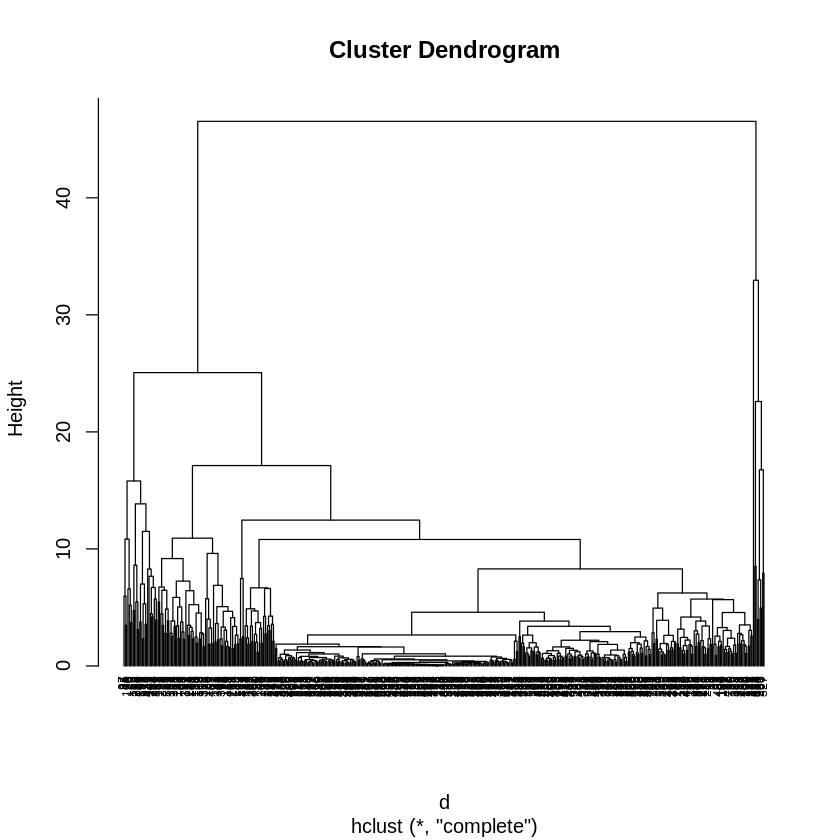

In [ ]:
d <- dist(scale(clustaggregatestart[,c(-1)]))
hc.complete <- hclust(d, method="complete")

plot(hc.complete, cex = 0.6, hang = -1)

**K-means**


Using k-means clustering, we find that cluster 1 has 384 data points while cluster 2 has 103 data points.
55.1% variance in the data is explained by this clustering.

In [ ]:
kmm<-kmeans(scale(clustaggregateend[,c(-1)]),2)
kmm
temp2<-data.frame(clustaggregateend$End,kmm$cluster)

K-means clustering with 2 clusters of sizes 384, 103

Cluster means:
  Clusterdata.Duration    January   February     March      April        May
1           -0.3478641 -0.4114516 -0.4221339 -0.421375 -0.4049759 -0.4130981
2            1.2968913  1.5339554  1.5737807  1.570952  1.5098129  1.5400939
        June       July     August  September    October   November   December
1 -0.4124697 -0.4059672 -0.4072858 -0.4154224 -0.4140965 -0.4158041 -0.4085928
2  1.5377513  1.5135087  1.5184248  1.5487592  1.5438159  1.5501823  1.5232975
      Sunday     Monday    Tuesday Wednesday   Thursday     Friday   Saturday
1 -0.3875295 -0.4209459 -0.4183005 -0.417671 -0.4159171 -0.4203299 -0.3878964
2  1.4447703  1.5693516  1.5594891  1.557142  1.5506036  1.5670552  1.4461381
       hour0      hour1      hour2      hour3      hour4      hour5      hour6
1 -0.3673117 -0.3631042 -0.3605128 -0.3430877 -0.1869584 -0.3091844 -0.3221509
2  1.3693951  1.3537089  1.3440478  1.2790841  0.6970101  1.1526876  1.

**Storing the resulting clusters**

In [ ]:
data$startcluster1<-ifelse(data$Start.station %in% temp[temp$km.cluster==1,]$clustaggregatestart.Start,1,0)
data$startcluster2<-ifelse(data$Start.station %in% temp[temp$km.cluster==2,]$clustaggregatestart.Start,1,0)
data$endcluster1<-ifelse(data$End.station %in% temp2[temp2$kmm.cluster==1,]$clustaggregateend.End,1,0)
data$endcluster2<-ifelse(data$End.station %in% temp2[temp2$kmm.cluster==2,]$clustaggregateend.End,1,0)

## Machine Learning Pricing Models

From the EDA the most important differentiating variables are hour, month and type of user. These variables will be used as independant variables to find demand. Start and End station clusters are also used.

**Preprocessing**

In [ ]:
data2<-data.frame(data$Bike.number,data$startcluster1,data$startcluster2,data$hour,data$month,data$Member.type,data$endcluster1,data$endcluster2)
head(data2)


,data.Bike.number,data.startcluster1,data.startcluster2,data.hour,data.month,data.Member.type,data.endcluster1,data.endcluster2
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,W00869,0,1,00,January,Member,1,0
2,W00894,0,1,00,January,Casual,0,1
3,W21945,0,1,00,January,Casual,0,1
4,W20012,0,1,00,January,Casual,0,1
5,W22786,0,1,00,January,Casual,0,1
6,W20890,0,1,00,January,Casual,0,1


In [ ]:
dataFinal<-aggregate(data2$data.Bike.number,by=list(data2$data.hour,data2$data.month,data2$data.Member.type,as.character(data2$data.startcluster1),as.character(data2$data.endcluster1)),FUN="length")
names(dataFinal)<-c("hour","month","type","startcluster1","endcluster1","demand")
head(dataFinal)

,hour,month,type,startcluster1,endcluster1,demand
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,00,April,Casual,0,0,518
2,01,April,Casual,0,0,305
3,02,April,Casual,0,0,207
4,03,April,Casual,0,0,95
5,04,April,Casual,0,0,43
6,05,April,Casual,0,0,69


In [ ]:
summary(dataFinal)

     hour              month               type           startcluster1     
 Length:2303        Length:2303        Length:2303        Length:2303       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 endcluster1            demand     
 Length:2303        Min.   :    1  
 Class :character   1st Qu.:  176  
 Mode  :character   Median :  869  
                    Mean   : 1632  
                    3rd Qu.: 2208  
                    Max.   :14816  

**Distribution of demand**

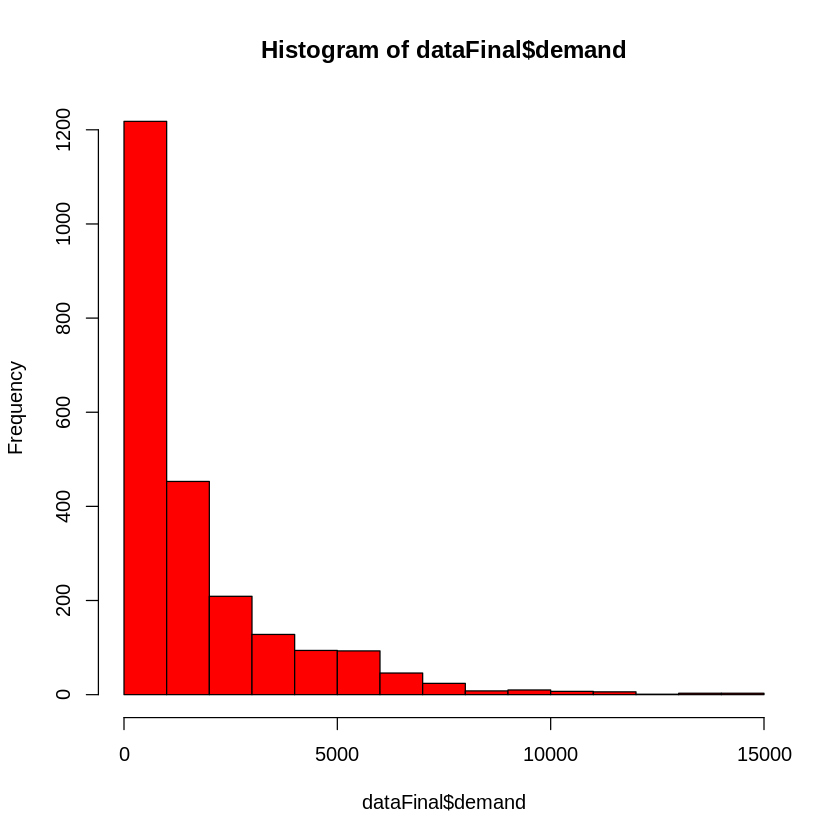

In [ ]:
hist(dataFinal$demand,col="Red")

### Linear Regression

**Model Fitting**

In [ ]:
l<-lm(log(demand)~hour+month+type+startcluster1+endcluster1+hour*type+startcluster1*endcluster1,data=train)
summary(l)


Call:
lm(formula = log(demand) ~ hour + month + type + startcluster1 + 
    endcluster1 + hour * type + startcluster1 * endcluster1, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.45794 -0.24178 -0.00056  0.25868  1.43925 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.91881    0.06987  84.706  < 2e-16 ***
hour01                    -0.48556    0.08737  -5.558 3.22e-08 ***
hour02                    -1.14364    0.08877 -12.883  < 2e-16 ***
hour03                    -1.57615    0.08811 -17.889  < 2e-16 ***
hour04                    -2.10265    0.08875 -23.692  < 2e-16 ***
hour05                    -1.66972    0.08616 -19.378  < 2e-16 ***
hour06                    -0.66977    0.08612  -7.777 1.35e-14 ***
hour07                     0.52524    0.08875   5.918 4.00e-09 ***
hour08                     1.21995    0.09129  13.363  < 2e-16 ***
hour09                     1.45803    0.08956  16.280  < 2

Check for randomness of residuals

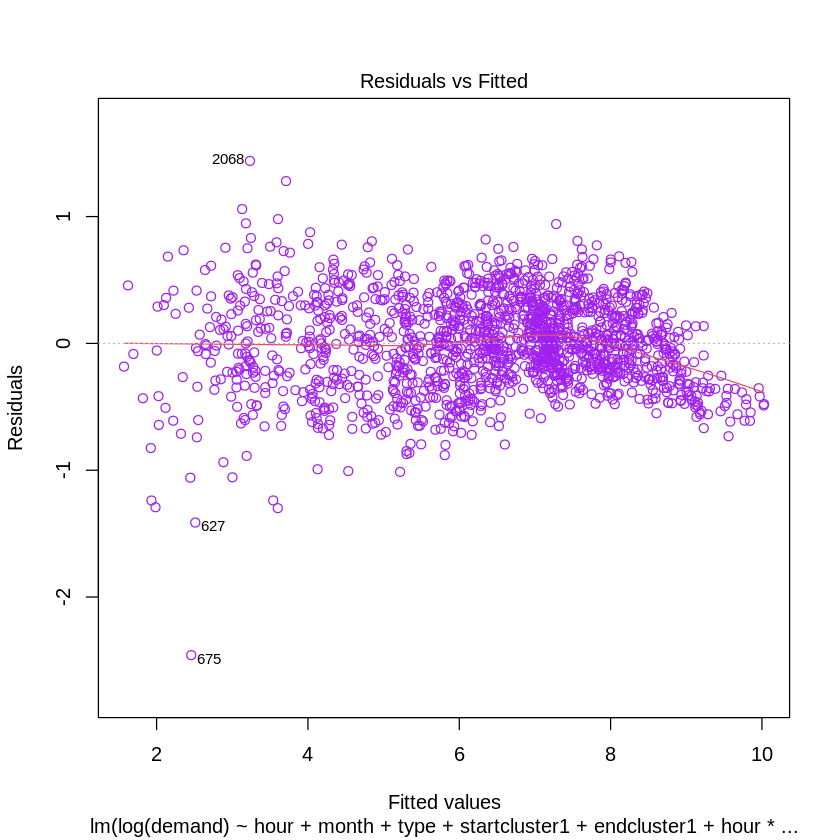

In [ ]:
plot(l,1,col="purple")

Check for Normality

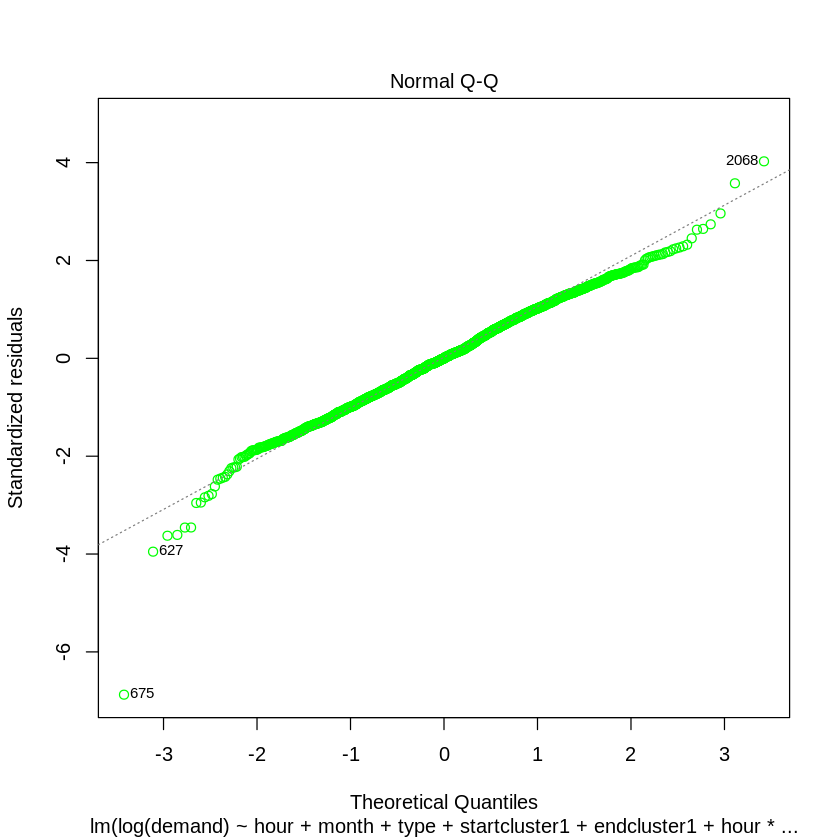

In [ ]:
plot(l,2,col="green")

**Validation**

In [ ]:
pred<-predict(l,newdata=test)
head(pred)

1        4        5        6        9       15 
5.918813 4.342663 3.816160 4.249092 7.138763 8.243617

Check for randomness of residuals

In [ ]:
demand<-test$demand
MSE0<- sqrt(sum((pred - demand)^2))
MSE0

[1] 69451.43

### Poisson Regression

**Model Fitting**

In [ ]:
lp<-glm(demand~hour+month+type+startcluster1+endcluster1+hour*type+startcluster1*endcluster1,family=poisson,data=train)
summary(lp)


Call:
glm(formula = demand ~ hour + month + type + startcluster1 + 
    endcluster1 + hour * type + startcluster1 * endcluster1, 
    family = poisson, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-37.583   -6.703   -1.200    4.497   47.787  

Coefficients:
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                6.072822   0.011970  507.346  < 2e-16 ***
hour01                    -0.520203   0.020090  -25.893  < 2e-16 ***
hour02                    -1.103800   0.025155  -43.880  < 2e-16 ***
hour03                    -1.708680   0.032699  -52.256  < 2e-16 ***
hour04                    -2.253923   0.040474  -55.688  < 2e-16 ***
hour05                    -1.731985   0.033385  -51.878  < 2e-16 ***
hour06                    -0.778284   0.021378  -36.407  < 2e-16 ***
hour07                     0.270486   0.015905   17.006  < 2e-16 ***
hour08                     0.962728   0.014602   65.929  < 2e-16 ***
hour09        

Check for randomness of residuals

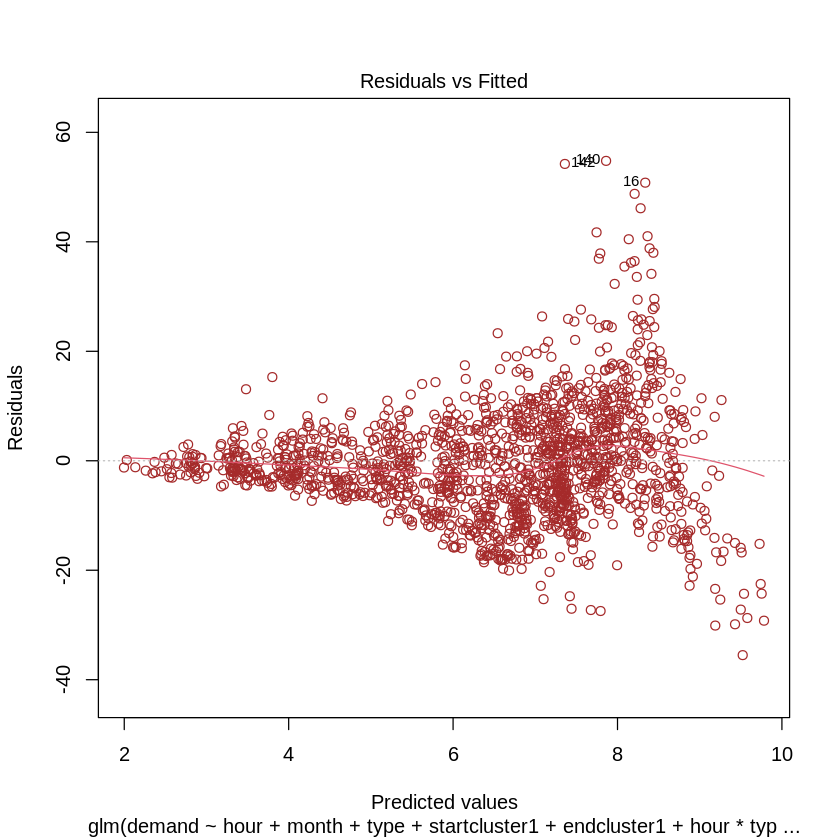

In [ ]:
plot(lp,1,col="brown")

There is a trend in the residual plot. This means there is correlation between the residuals and the fitted values. Perhaps another important variable is omitted.

Check for Normality

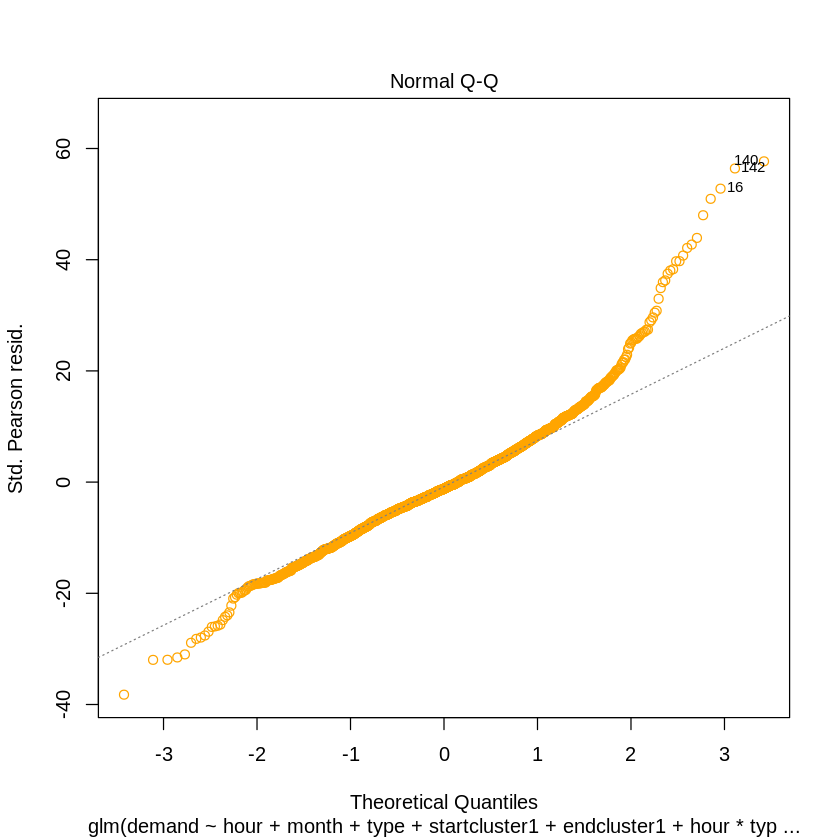

In [ ]:
plot(lp,2,col="orange")

The plot deviates from the 45% line. This shows deviation from normality. The poisson distribution should converge at a normal but here its not the case.

**Validation**

In [ ]:
pred0<-predict(lp,newdata=test)
head(pred0)

1        4        5        6        9       15 
6.072822 4.364142 3.818899 4.340837 7.035549 8.319520

In [ ]:
demand<-test$demand
MSE1<- sqrt(sum((pred0 - demand)^2))
MSE1

[1] 69451.92

### Decision Trees

**Model Fitting**

In [ ]:
fit <- rpart(demand~hour+month+type+startcluster1+endcluster1, data = train,parms = list(split="gini"),control = rpart.control(minsplit = 3,cp = 0.0))

In [ ]:
pfit<-prune(fit,cp=0.01)

In [ ]:
summary(pfit)

Call:
rpart(formula = demand ~ hour + month + type + startcluster1 + 
    endcluster1, data = train, parms = list(split = "gini"), 
    control = rpart.control(minsplit = 3, cp = 0))
  n= 1613 

           CP nsplit rel error    xerror       xstd
1  0.24113308      0 1.0000000 1.0022125 0.06905603
2  0.18592964      1 0.7588669 0.7747153 0.05558289
3  0.11251866      2 0.5729373 0.5829240 0.04461581
4  0.04557661      3 0.4604186 0.4818802 0.03289484
5  0.03876958      5 0.3692654 0.4060904 0.02781575
6  0.03679070      7 0.2917262 0.3681931 0.02280153
7  0.03013180      9 0.2181448 0.2797195 0.01690790
8  0.02677265     10 0.1880130 0.2446999 0.01548293
9  0.01220487     11 0.1612404 0.1906381 0.01281053
10 0.01027090     12 0.1490355 0.1740293 0.01199270
11 0.01000000     13 0.1387646 0.1725829 0.01215521

Variable importance
         hour          type startcluster1   endcluster1         month 
           45            20            18             9             8 

Node number 1: 16

**Plot**

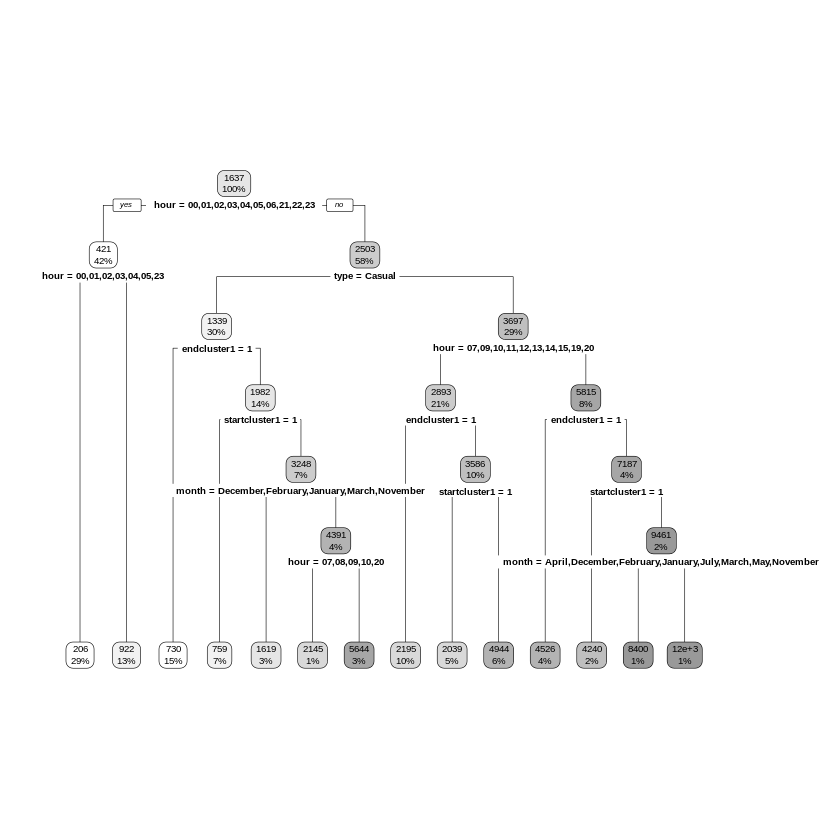

In [ ]:
rpart.plot(pfit, box.palette="Grays",type=2,tweak=1.1)

**Validation**

In [ ]:
pred1<-predict(fit,newdata=test)
head(pred)

1        4        5        6        9       15 
5.918813 4.342663 3.816160 4.249092 7.138763 8.243617

In [ ]:
demand1<-test$demand
MSE2<- sqrt(sum((pred1 - demand1)^2))
MSE2

[1] 9503.377

### Random Forest

**Model Fitting**

In [ ]:
rf.demand = randomForest(demand~hour+month+type+startcluster1+endcluster1, data =train,ntree=10000)
rf.demand


Call:
 randomForest(formula = demand ~ hour + month + type + startcluster1 +      endcluster1, data = train, ntree = 10000) 
               Type of random forest: regression
                     Number of trees: 10000
No. of variables tried at each split: 1

          Mean of squared residuals: 2057052
                    % Var explained: 52.88

**Variable** **Importance**

In [ ]:
importance(rf.demand)

,IncNodePurity
hour,1028483085
month,123864735
type,696675055
startcluster1,405616651
endcluster1,372569017


**Validation**

In [ ]:
pred2<-predict(rf.demand,newdata=test)
head(pred)

1        4        5        6        9       15 
5.918813 4.342663 3.816160 4.249092 7.138763 8.243617

In [ ]:
demand2<-test$demand
MSE3<- sqrt(sum((pred2 - demand2)^2))
MSE3

[1] 38333.41

## Comparing Models

In [ ]:
result<-data.frame(model=c("Linear Regression","Poisson Regression","Decision Trees","Random Forest"),MSE=c(MSE0,MSE1,MSE2,MSE3))
result

model,MSE
<chr>,<dbl>
Linear Regression,69451.431
Poisson Regression,69451.918
Decision Trees,9503.377
Random Forest,38333.406


**Best Model**

In [ ]:
result$model[which.min(result$MSE)]

[1] "Decision Trees"



---



## Conclusion

Among the three models, the least MSE is from the Decision tree model . Also, from MLR, we see that the demand has been predicted with a significantly good R-square value and adjusted R-squared value of 95.67%. The poisson distribution's assumptions failed which is evident from the plots.

It is found that the date of the month does not influence the demand during that particular hour, whereas the member type, month and time influences the demand of the bikes significantly. 

With similar models and better factors, we would be able to apply similar algorithms for other industries like taxi, hotels, bars, airlines, etc.

As an extension of this project, if we have data-points of fare charged will also be able to help on how much demand is there at a particular price point. With that we shall have an idea of a dynamic Demand curve for an industry and shall be able to predict the future demand and price the service in such a way that we can harvest maximum consumer surplus.
